<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/MSPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [149]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [150]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [176]:
X = df.drop(columns=['Gender','DailyRate'], axis=1)
y = df['Attrition']

In [177]:
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
y = y.map({'Yes': 1, 'No': 0})

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier
model_1= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc*100)


Accuracy: 100.0


In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



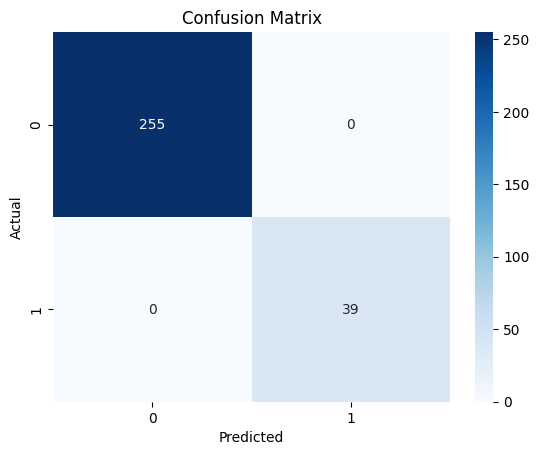

In [130]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [131]:
from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=1)
model_3.fit(X_train, y_train)
predictions = model_3.predict(X_test)
Acc3 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc3*100)

Accuracy :  100.0


In [132]:

from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=1)
model_3.fit(X_train, y_train)
predictions = model_3.predict(X_test)
Acc3 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc3*100)

Accuracy :  100.0


In [133]:

from sklearn.ensemble import GradientBoostingClassifier
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)
Acc2 =accuracy_score(y_test, predictions)
print('Accuracy : ',Acc2*100)

Accuracy :  100.0


In [134]:
from xgboost import XGBClassifier
model_4 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
model_4.fit(X_train, y_train)
predictions = model_4.predict(X_test)
Acc4 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc4*100)

Accuracy :  100.0


In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
model_5 = BaggingClassifier(n_estimators=100, random_state=1)
model_5.fit(X_train, y_train)
predictions = model_5.predict(X_test)
Acc5 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc5*100)

Accuracy :  100.0


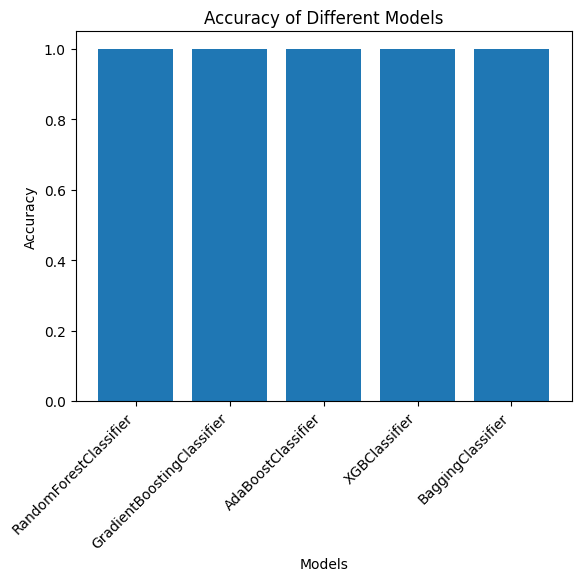

In [136]:
models=['RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier','BaggingClassifier'] # Changed to string representations of the model names
accuracy=[acc,Acc2,Acc3,Acc4,Acc5]
plt.bar(models,accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.show()
